<a href="https://colab.research.google.com/github/Nanangk/CNN_with_TensorFlow-Keras/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network With TenserFlow + Keras**

Import Library yang dibutuhkan

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#Download datanya
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Mari kita cek Jumlah data dan sizenya

In [0]:
xtrain.shape

(60000, 28, 28)

In [0]:
xtest.shape

(10000, 28, 28)

Terdapat 60.000 Gambar data training dan 1000 gambar data testing dengan size 28 x 28 piksel

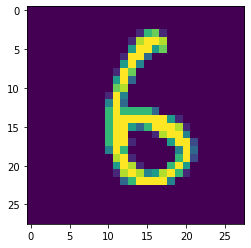

In [0]:
#coba cek gambarnya
plt.imshow(xtest[3000])

In [0]:
ytest[3000]

6

In [0]:
#cek ytrain masih berupa numerical
ytrain[3000]

9

In [0]:
xtrain = xtrain.reshape(60000, 28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [0]:
#konversi ytrain dan ytest dari numerical ke ctegorical
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

Buat Model CNN nya

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Liat Bentuk Modelnya

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

Compile Modelnya

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

Waktunya Mentraining

In [0]:
model.fit(xtrain, ytrain, 
          batch_size=128, 
          epochs=5, 
          verbose=1,
          validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 259us/step - loss: 0.6275 - accuracy: 0.9097 - val_loss: 0.0600 - val_accuracy: 0.9802
Epoch 2/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0961 - accuracy: 0.9728 - val_loss: 0.0464 - val_accuracy: 0.9849
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.0301 - val_accuracy: 0.9896
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0508 - accuracy: 0.9858 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.0294 - val_accuracy: 0.9907


Coba Predict

In [53]:
xd = model.predict(xtest[11].reshape(1,28,28,1))
xd

array([[6.82840152e-07, 8.64914598e-11, 1.27201999e-10, 7.92116980e-12,
        2.86201635e-11, 2.75152825e-08, 9.99999285e-01, 1.04435564e-13,
        1.04027480e-08, 3.44464735e-11]], dtype=float32)

In [54]:
ytest[11]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [55]:
def uji(xd):
  a_max = xd.max()
  mylist = xd[0]
  i=0
  for i in range(len(mylist)):
    if mylist[i] == a_max:
      print(str(a_max * 100)+ '% menunjukkan ini angka :' +str(i))
    i+=1
   
uji(xd)

99.99992847442627% menunjukkan ini angka :6
